Bilbioteka **LibROSA**



In [ ]:
import librosa
import numpy as np
import scipy.stats
from scipy.stats import entropy
import matplotlib.pyplot as plt

In [ ]:
!pip install soundfile

In [ ]:
!pip install --upgrade librosa

In [ ]:
def extract_voice_features(audio_file_path):
    y, sr = librosa.load(audio_file_path, sr=None)

    czestotliwosci, amplitudy = librosa.core.piptrack(y=y, sr=sr)
    czestotliwosci = czestotliwosci[czestotliwosci > 0]  # Usuwanie zerowych wartości

    #MDVP:Fo(Hz)
    fo = np.mean(czestotliwosci)  # podstawowa częstotliwość

    #MDVP:Fhi(Hz)
    fhi = np.max(czestotliwosci)  # max częstotliwość

    #MDVP:Flo(Hz)
    flo = np.min(czestotliwosci)  # min częstotliwość

    #MDVP:Jitter(%)
    jitter_percent = np.std(np.diff(czestotliwosci)) / np.mean(czestotliwosci)

    #MDVP:Shimmer(dB)
    shimmer_db = np.std(librosa.amplitude_to_db(y))


    parametry = {
        "MDVP:Fo(Hz)": fo,
        "MDVP:Fhi(Hz)": fhi,
        "MDVP:Flo(Hz)": flo,
        "MDVP:Jitter(%)": jitter_percent,
        "MDVP:Shimmer(dB)": shimmer_db,

    }

    return parametry

In [ ]:
# Próbne nagranie
voice_file_probne = '/content/drive/MyDrive/Colab Notebooks/Praca inżynierska/Nagrania/Parkinsson_probne.m4a'
parameters_probne = extract_voice_features(voice_file_probne)
print(parameters_probne)

<ipython-input-4-7338e4e9e7ec>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file_path, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


{'MDVP:Fo(Hz)': 1411.9435, 'MDVP:Fhi(Hz)': 3992.8994, 'MDVP:Flo(Hz)': 152.4182, 'MDVP:Jitter(%)': 0.0060450123, 'MDVP:Shimmer(dB)': 18.958214}


In [ ]:
parameters_probne['MDVP:Fo(Hz)']

1411.9435

In [ ]:
# Głos kobieta młoda
kobieta_glos = '/content/drive/MyDrive/Colab Notebooks/Praca inżynierska/Nagrania/Gabi.m4a'
parameters_kobieta = extract_voice_features(kobieta_glos)
print(parameters_kobieta)

{'MDVP:Fo(Hz)': 1533.5787, 'MDVP:Fhi(Hz)': 3992.8103, 'MDVP:Flo(Hz)': 152.76158, 'MDVP:Jitter(%)': 0.005739646, 'MDVP:Shimmer(dB)': 18.088366}


<ipython-input-4-7338e4e9e7ec>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file_path, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [ ]:
# Głos mężczyzna młody
mezczyzna_glos = '/content/drive/MyDrive/Colab Notebooks/Praca inżynierska/Nagrania/Dominik.m4a'
parameters_mezczyzna = extract_voice_features(mezczyzna_glos)
print(parameters_mezczyzna)

{'MDVP:Fo(Hz)': 1226.1847, 'MDVP:Fhi(Hz)': 3993.2664, 'MDVP:Flo(Hz)': 152.51501, 'MDVP:Jitter(%)': 0.007120257, 'MDVP:Shimmer(dB)': 17.474928}


<ipython-input-4-7338e4e9e7ec>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file_path, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [ ]:
# Głos dziewczynka dziecko (4 lata)
dziewczynka_glos = '/content/drive/MyDrive/Colab Notebooks/Praca inżynierska/Nagrania/Klara.m4a'
parameters_dziewczynka = extract_voice_features(dziewczynka_glos)
print(parameters_dziewczynka)

<ipython-input-4-7338e4e9e7ec>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file_path, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


{'MDVP:Fo(Hz)': 1683.2366, 'MDVP:Fhi(Hz)': 3992.701, 'MDVP:Flo(Hz)': 139.98796, 'MDVP:Jitter(%)': 0.0047125164, 'MDVP:Shimmer(dB)': 15.67103}


In [ ]:
# Głos chłopiec 1,5 roku
chlopiec_glos = '/content/drive/MyDrive/Colab Notebooks/Praca inżynierska/Nagrania/Boris2.m4a'
parameters_chlopiec = extract_voice_features(chlopiec_glos)
print(parameters_chlopiec)

<ipython-input-4-7338e4e9e7ec>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file_path, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


{'MDVP:Fo(Hz)': 1371.9354, 'MDVP:Fhi(Hz)': 3991.7983, 'MDVP:Flo(Hz)': 152.47592, 'MDVP:Jitter(%)': 0.0063205105, 'MDVP:Shimmer(dB)': 18.18201}


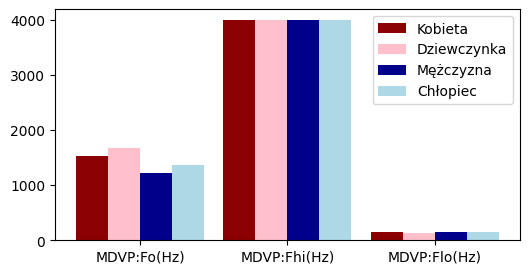

In [ ]:
barWidth = 0.25
gap = 0.15
fig, ax = plt.subplots(figsize=(6, 3))

kobieta_hz = [1533.5787, 3992.8103, 152.76158]
mezczyzna_hz = [1226.1847, 3993.2664, 152.51501]
dziewczynka_hz = [1683.2366, 3992.701, 139.98796]
chlopiec_hz = [1371.9354, 3991.7983, 152.47592]

br1 = np.arange(len(kobieta_hz)) * (barWidth * 4 + gap)
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]


plt.bar(br1, kobieta_hz, width=barWidth, color='darkred', label='Kobieta')
plt.bar(br2, dziewczynka_hz, width=barWidth, color='pink', label='Dziewczynka')
plt.bar(br3, mezczyzna_hz, width=barWidth, color='darkblue', label='Mężczyzna')
plt.bar(br4, chlopiec_hz, width=barWidth, color='lightblue', label='Chłopiec')

plt.xticks([r + 1.5 * barWidth for r in br1], ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)'])

plt.legend()
plt.show()


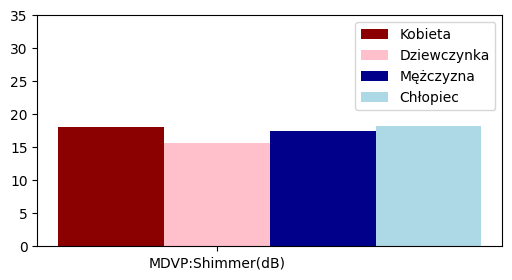

In [ ]:
barWidth = 0.25
fig = plt.subplots(figsize =(6, 3))

kobieta_dB = [18.088366]
mezczyzna_dB = [17.474928]
dziewczynka_dB = [15.67103]
chlopiec_dB = [18.18201]

br1 = np.arange(len(kobieta_dB))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

plt.bar(br1, kobieta_dB, width=barWidth, color='darkred', label='Kobieta')
plt.bar(br2, dziewczynka_dB, width=barWidth, color='pink', label='Dziewczynka')
plt.bar(br3, mezczyzna_dB, width=barWidth, color='darkblue', label='Mężczyzna')
plt.bar(br4, chlopiec_dB, width=barWidth, color='lightblue', label='Chłopiec')

plt.xticks([r + barWidth for r in range(len(kobieta_dB))],
        ['MDVP:Shimmer(dB)'])
plt.ylim(0, 35)

plt.legend()
plt.show()


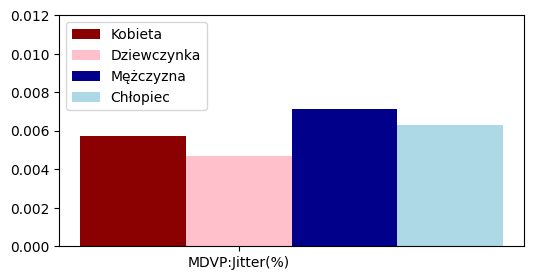

In [ ]:
barWidth = 0.25
fig = plt.subplots(figsize =(6, 3))

kobieta_per = [0.005739646]
mezczyzna_per = [0.007120257]
dziewczynka_per = [0.0047125164]
chlopiec_per = [0.0063205105,]

br1 = np.arange(len(kobieta_per))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

plt.bar(br1, kobieta_per, width=barWidth, color='darkred', label='Kobieta')
plt.bar(br2, dziewczynka_per, width=barWidth, color='pink', label='Dziewczynka')
plt.bar(br3, mezczyzna_per, width=barWidth, color='darkblue', label='Mężczyzna')
plt.bar(br4, chlopiec_per, width=barWidth, color='lightblue', label='Chłopiec')


plt.xticks([r + barWidth for r in range(len(kobieta_per))],
        ['MDVP:Jitter(%)'])
plt.ylim(0, 0.012)


plt.legend()
plt.show()


<ipython-input-14-41fef0f4a4d4>:3: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_file_path, sr=None)  # y - tablica z danymi audio, sr - częstotliwość próbkowania
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


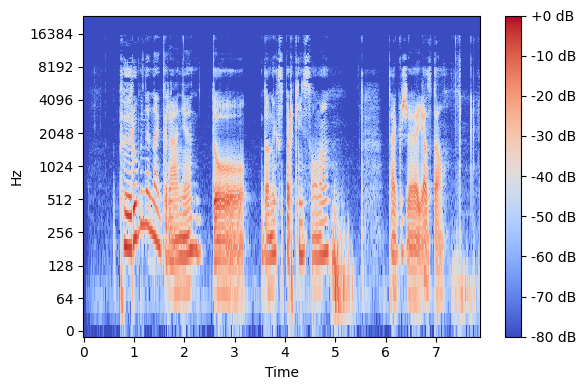

In [ ]:
#Spektrogram głosowy próbne
audio_file_path = '/content/drive/MyDrive/Colab Notebooks/Praca inżynierska/Nagrania/Parkinsson_probne.m4a'
y, sr = librosa.load(audio_file_path, sr=None)  # y - tablica z danymi audio, sr - częstotliwość próbkowania

D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)  # konwersja na dB

plt.figure(figsize=(6, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
#plt.xlabel('Czas')
plt.tight_layout()
plt.show()

<ipython-input-24-a91239d7d55d>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(kobieta_glos, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


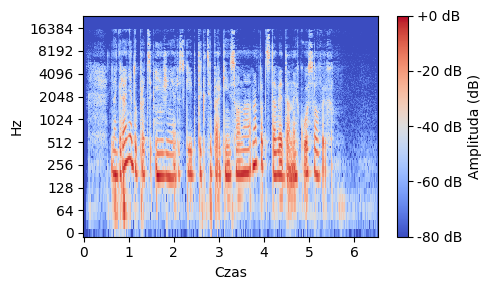

In [ ]:
# Spektrogram kobieta
dynamic_range = (-80, 0)

y, sr = librosa.load(kobieta_glos, sr=None)

D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure(figsize=(5, 3))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='coolwarm', vmin=dynamic_range[0], vmax=dynamic_range[1])
plt.colorbar(format='%+2.0f dB', label="Amplituda (dB)")
plt.xlabel('Czas')
plt.tight_layout()
plt.show()

<ipython-input-20-fbd1de519353>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(mezczyzna_glos, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


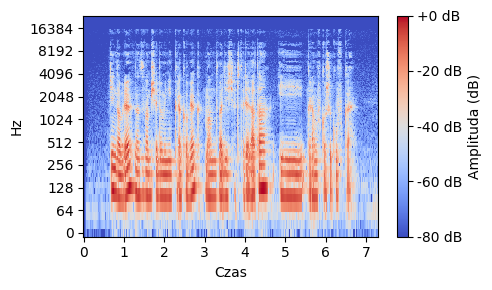

In [ ]:
# Spektrogram mezczyzna
dynamic_range = (-80, 0)

y, sr = librosa.load(mezczyzna_glos, sr=None)

D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)


plt.figure(figsize=(5, 3))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='coolwarm', vmin=dynamic_range[0], vmax=dynamic_range[1])
plt.colorbar(format='%+2.0f dB', label="Amplituda (dB)")
plt.xlabel('Czas')
plt.tight_layout()
plt.show()

<ipython-input-21-ab04cbc79230>:5: UserWarning: PySoundFile failed. Trying audioread instead.
  y1, sr1 = librosa.load(dziewczynka_glos, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


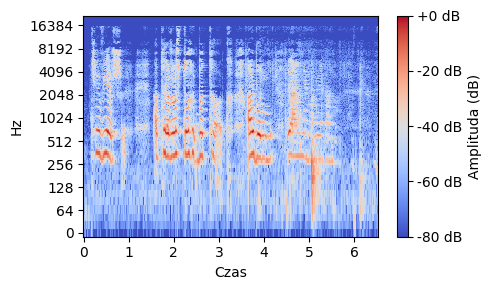

In [ ]:
# Spektrogram dziewczynka
dynamic_range = (-80, 0)

y1, sr1 = librosa.load(dziewczynka_glos, sr=None)
D1 = librosa.stft(y1)
S_db1 = librosa.amplitude_to_db(np.abs(D1), ref=np.max)

plt.figure(figsize=(5, 3))
librosa.display.specshow(S_db1, sr=sr1, x_axis='time', y_axis='log', cmap='coolwarm', vmin=dynamic_range[0], vmax=dynamic_range[1])
plt.colorbar(format='%+2.0f dB', label="Amplituda (dB)")
plt.xlabel('Czas')
plt.tight_layout()
plt.show()

<ipython-input-22-8c5d8746f742>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  y2, sr2 = librosa.load(chlopiec_glos, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


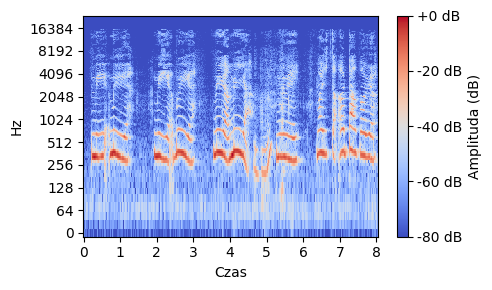

In [ ]:
# Spektrogram chłopiec
dynamic_range = (-80, 0)
y2, sr2 = librosa.load(chlopiec_glos, sr=None)
D2 = librosa.stft(y2)
S_db2 = librosa.amplitude_to_db(np.abs(D2), ref=np.max)

plt.figure(figsize=(5, 3))
librosa.display.specshow(S_db2, sr=sr2, x_axis='time', y_axis='log', cmap='coolwarm', vmin=dynamic_range[0], vmax=dynamic_range[1])
plt.colorbar(format='%+2.0f dB', label="Amplituda (dB)")
plt.xlabel('Czas')
plt.tight_layout()
plt.show()